In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


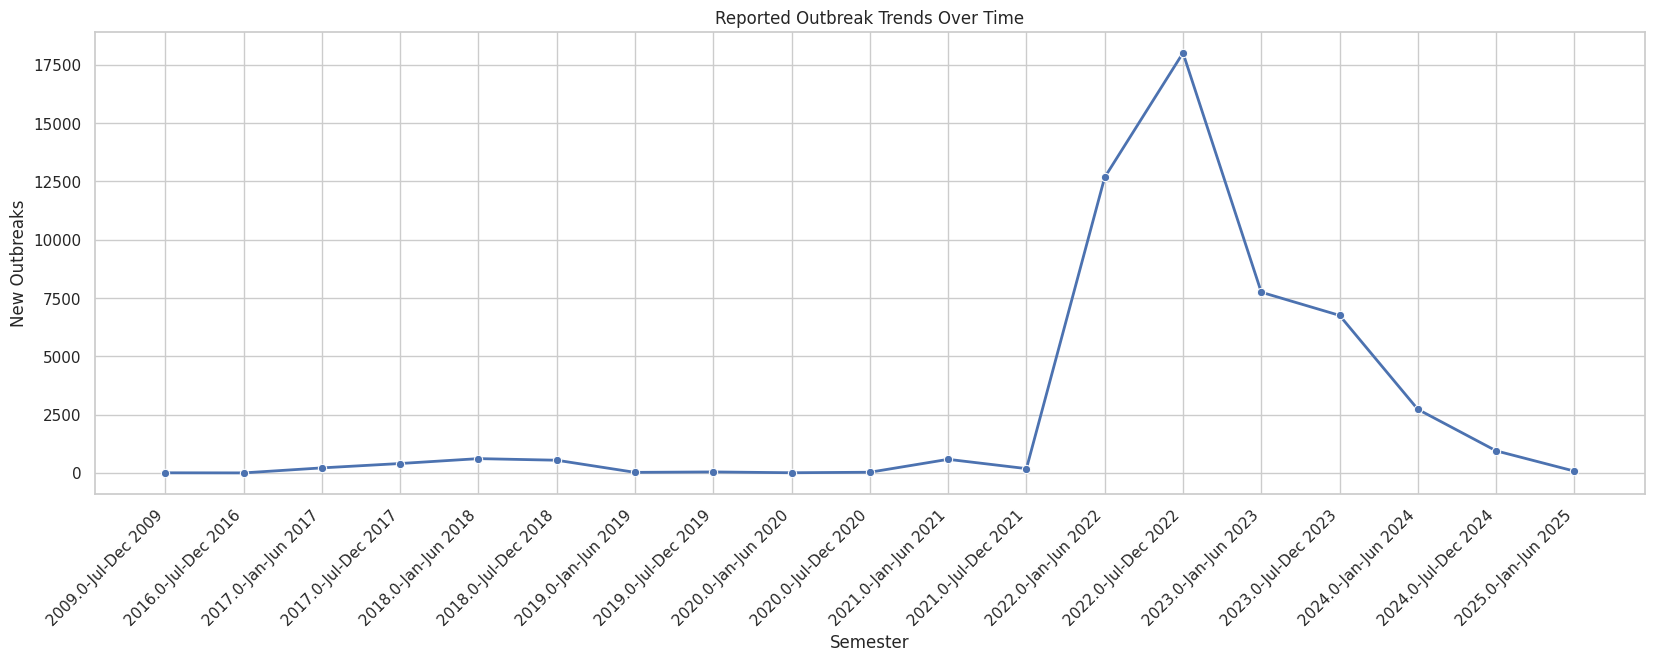

In [10]:
data = pd.read_csv('afg_geocoded_imputed.csv')

# Create a column for ordering: Combining Year and Semester
data['Time'] = data['Year'].astype(str) + "-" + data['Semester']

# Define semester order
semester_order = {'Jan-Jun': 1, 'Jul-Dec': 2}
data['SemesterOrder'] = data['Semester'].map(semester_order)

# Sort data by Year and Semester order
data = data.sort_values(by=['Year', 'SemesterOrder'])

# Aggregate new outbreaks per semester
agg_data = data.groupby('Time', as_index=False)['New outbreaks'].sum()

# Set plot style
sns.set_theme(style="whitegrid")

# Create line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=agg_data, x='Time', y='New outbreaks', marker='o', linewidth=2)

# Formatting the chart
plt.xticks(rotation=45, ha='right')
plt.xlabel("Semester")
plt.ylabel("New Outbreaks")
plt.title("Reported Outbreak Trends Over Time")
plt.grid(True)

# Show plot
plt.show()